# **CHURN ANALYSIS**# 

In [1]:
from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
%matplotlib inline 

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import tensorflow as tf

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Dataset 
https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data


In [3]:
dataset = pd.read_csv('../input/bigml_59c28831336c6604c800002a.csv')

print (dataset.shape)



(3333, 21)


In [4]:

X = dataset.iloc[:, dataset.columns!='phone number'].values
X = X[:,1:-1]
y = dataset.iloc[:, -1].values
print(X[0])

[128 415 'no' 'yes' 25 265.1 110 45.07 197.4 99 16.78 244.7 91 11.01 10.0
 3 2.7 1]


[128 415 0 1 25 265.1 110 45.07 197.4 99 16.78 244.7 91 11.01 10.0 3 2.7 1]


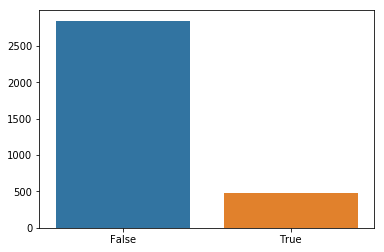

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
lw = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])
print(X[0])
Y = dataset["churn"].value_counts()
sns.barplot(Y.index, Y.values)

# **CHURN PREDICTION MODEL TRAINING**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X[0])

[128 415 0 1 25 265.1 110 45.07 197.4 99 16.78 244.7 91 11.01 10.0 3 2.7 1]


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# **BUILDING AND TRAINING OF NEURAL NETWORK**

In [11]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [13]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 20, epochs = 100)


Epoch 1/100
2666/2666 [==============================] - 1s 208us/step - loss: 0.5335 - acc: 0.8267
Epoch 2/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.4347 - acc: 0.8518
Epoch 3/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.3958 - acc: 0.8518
Epoch 4/100
2666/2666 [==============================] - 0s 64us/step - loss: 0.3698 - acc: 0.8518
Epoch 5/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.3482 - acc: 0.8530
Epoch 6/100
2666/2666 [==============================] - 0s 62us/step - loss: 0.3266 - acc: 0.8575
Epoch 7/100
2666/2666 [==============================] - 0s 64us/step - loss: 0.3066 - acc: 0.8601
Epoch 8/100
2666/2666 [==============================] - 0s 62us/step - loss: 0.2885 - acc: 0.8773
Epoch 9/100
2666/2666 [==============================] - 0s 62us/step - loss: 0.2740 - acc: 0.8878
Epoch 10/100
2666/2666 [==============================] - 0s 64us/step - loss: 0.2617 - acc: 0.8965
Epoch 11

2666/2666 [==============================] - 0s 63us/step - loss: 0.1685 - acc: 0.9460
Epoch 84/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1683 - acc: 0.9464
Epoch 85/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1677 - acc: 0.9460
Epoch 86/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1678 - acc: 0.9456
Epoch 87/100
2666/2666 [==============================] - 0s 70us/step - loss: 0.1678 - acc: 0.9475
Epoch 88/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1672 - acc: 0.9464
Epoch 89/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1674 - acc: 0.9464
Epoch 90/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1668 - acc: 0.9482
Epoch 91/100
2666/2666 [==============================] - 0s 63us/step - loss: 0.1660 - acc: 0.9479
Epoch 92/100
2666/2666 [==============================] - 0s 62us/step - loss: 0.1660 - acc: 0.9467
Epoch 93/100


In [14]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[False False]
 [False False]
 [False False]
 ...
 [False False]
 [ True  True]
 [False False]]


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The accuracy achieved is:",accuracy_score(y_test, y_pred)*100)

[[566  13]
 [ 32  56]]
The accuracy achieved is: 93.25337331334332


> # DATA ANALYSIS

Text(0.5,1,'State wise-Not Churned')

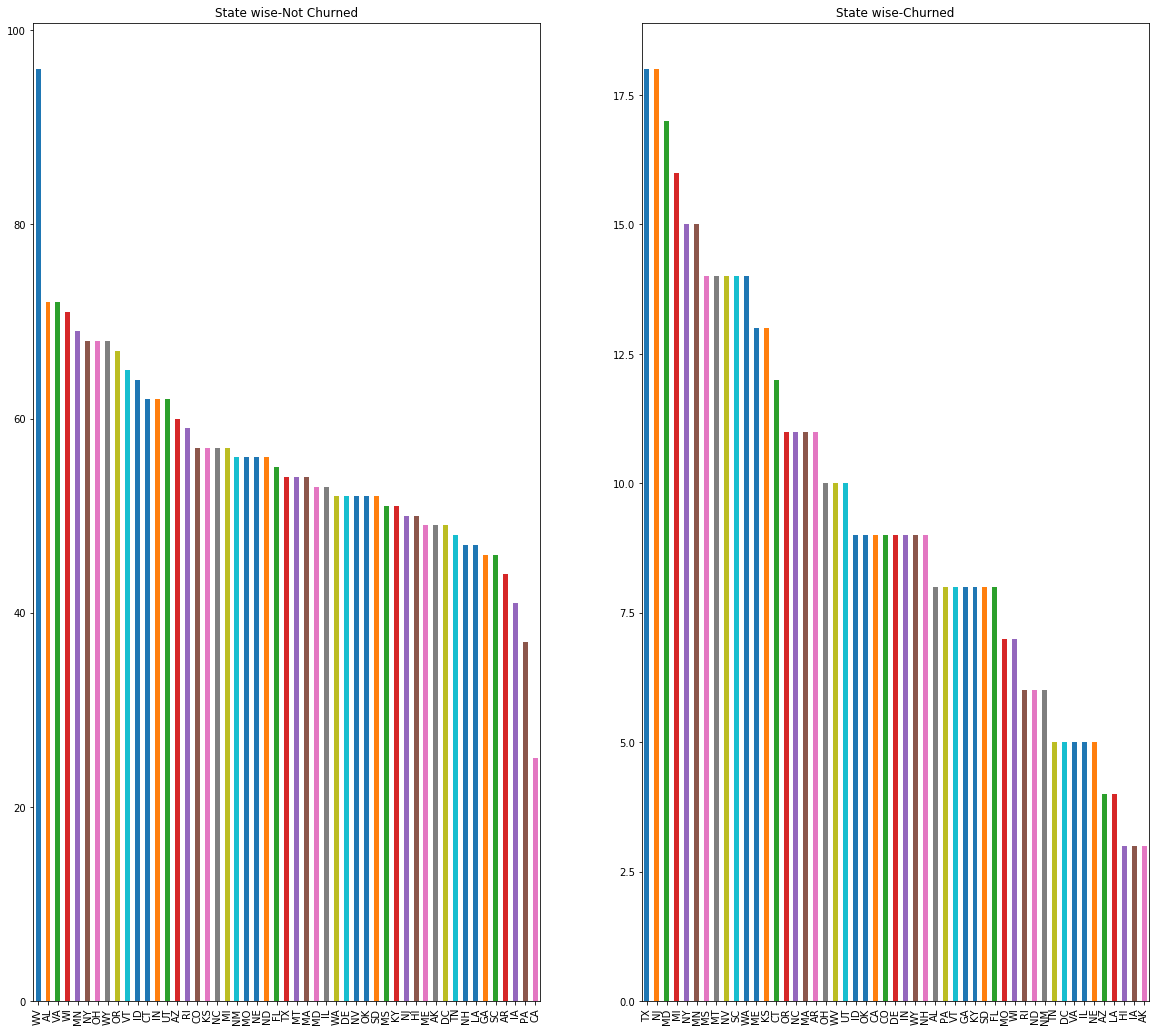

In [47]:
feature = 'state'
fig, ax = plt.subplots(1, 2, figsize=(20, 18))
dataset[dataset.churn == True][feature].value_counts().plot('bar', ax=ax[1]).set_title('State wise-Churned')
dataset[dataset.churn == False][feature].value_counts().plot('bar', ax=ax[0]).set_title('State wise-Not Churned')


Text(0.5,1,'Area code wise-Not Churned')

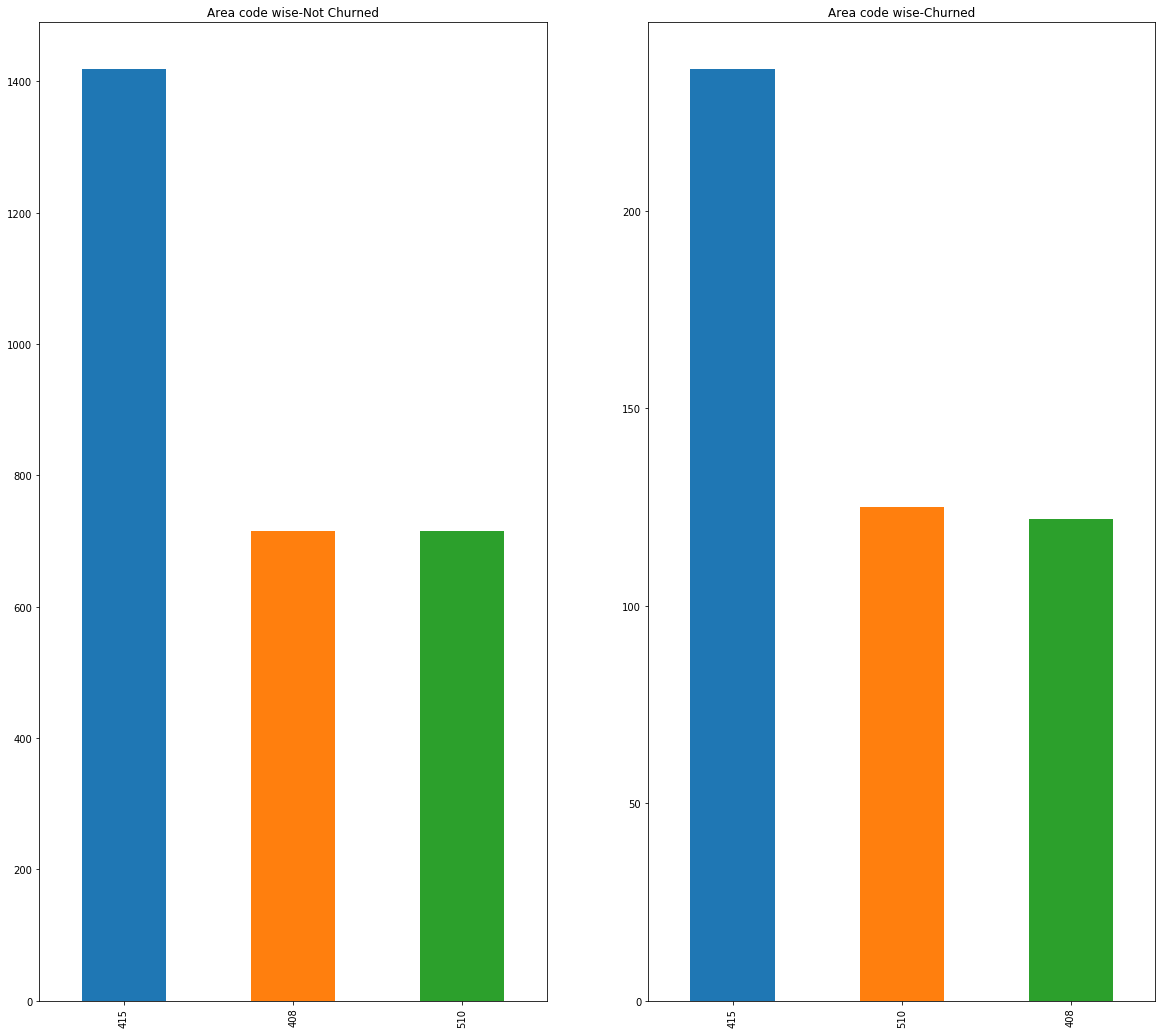

In [49]:
feature = 'area code'
fig, ax = plt.subplots(1, 2, figsize=(20, 18))
dataset[dataset.churn == True][feature].value_counts().plot('bar', ax=ax[1]).set_title('Area code wise-Churned')
dataset[dataset.churn == False][feature].value_counts().plot('bar', ax=ax[0]).set_title('Area code wise-Not Churned')

In [41]:
numerical_features = ["total day charge","total eve charge","total night charge","total intl charge" ]
dataset[numerical_features].describe()

,total day charge,total eve charge,total night charge,total intl charge
count,3333.000000,3333.000000,3333.000000,3333.000000
mean,30.562307,17.083540,9.039325,2.764581
std,9.259435,4.310668,2.275873,0.753773
min,0.000000,0.000000,1.040000,0.000000
25%,24.430000,14.160000,7.520000,2.300000
50%,30.500000,17.120000,9.050000,2.780000
75%,36.790000,20.000000,10.590000,3.270000
max,59.640000,30.910000,17.770000,5.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45541a06a0>,
      dtype=object)

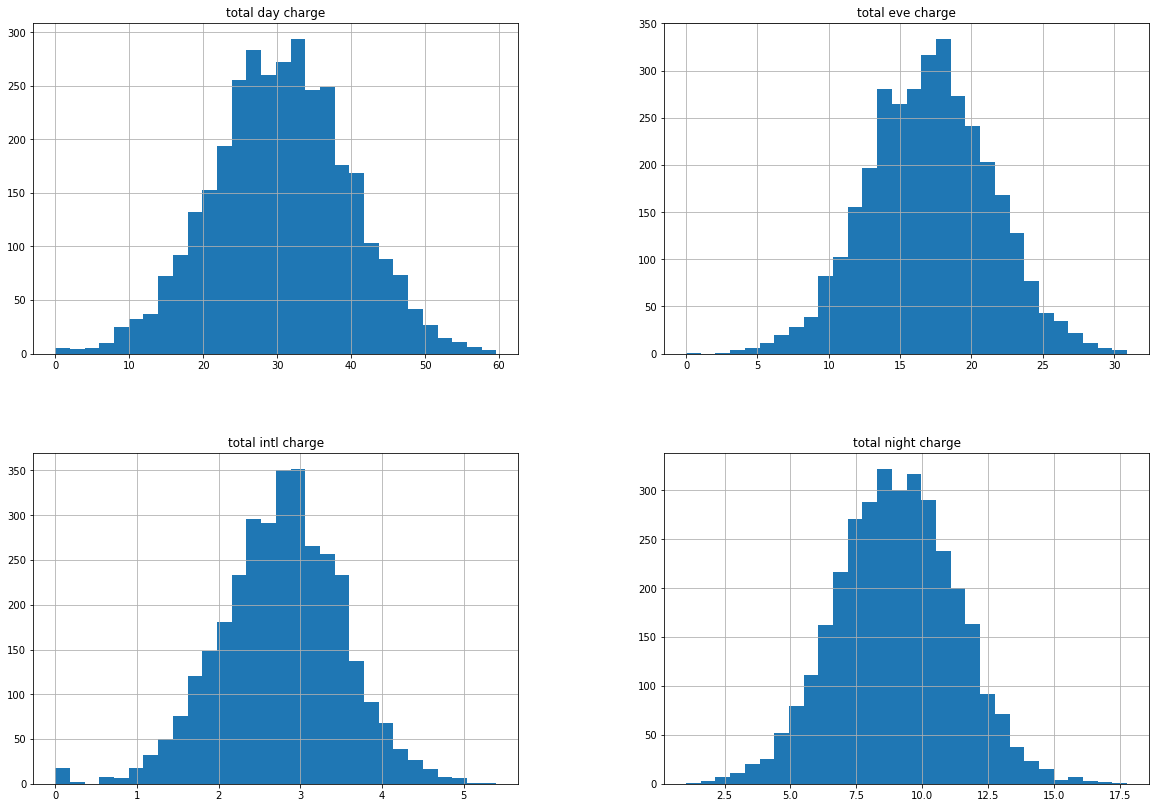

In [40]:
dataset[numerical_features].hist(bins=30, figsize=(20, 14))
